# Iris dataset studies
By Andrew M. Silva

The purpose of this notebook is to make a simple algorithm using the Iris dataset to guide beginners in their studies. It also explains some common steps in a Data Science project, like explore the data, plot some charts, build a predictive model, evaluate the model and get conclusions.

# Exploring the dataset
The first step to undertand what is the Iris dataset and what is possible to build with is explore its data.

## Importing the libraries

In [0]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [0]:
# Loading iris dataset and transforming it on a Data Frame
iris_ds = datasets.load_iris()
iris = pd.DataFrame(data=np.c_[iris_ds['data'], iris_ds['target']], columns= iris_ds['feature_names'] + ['target'])
# Printing the classes of flowers
print(iris_ds['target_names'])
# Printing the first 5 rows
iris.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


It is possible to see that this dataset has four characteristics (sepal length, sepal width, petal length, and petal width) and a class (target). The classification goes on 0 to 2, representing setosas, versicolors, and virginicas, respectively.

## Ploting characteristics
Attempting to better understand some patterns from Iris dataset, it is possible to plot its characteristics related to the flower classifications.

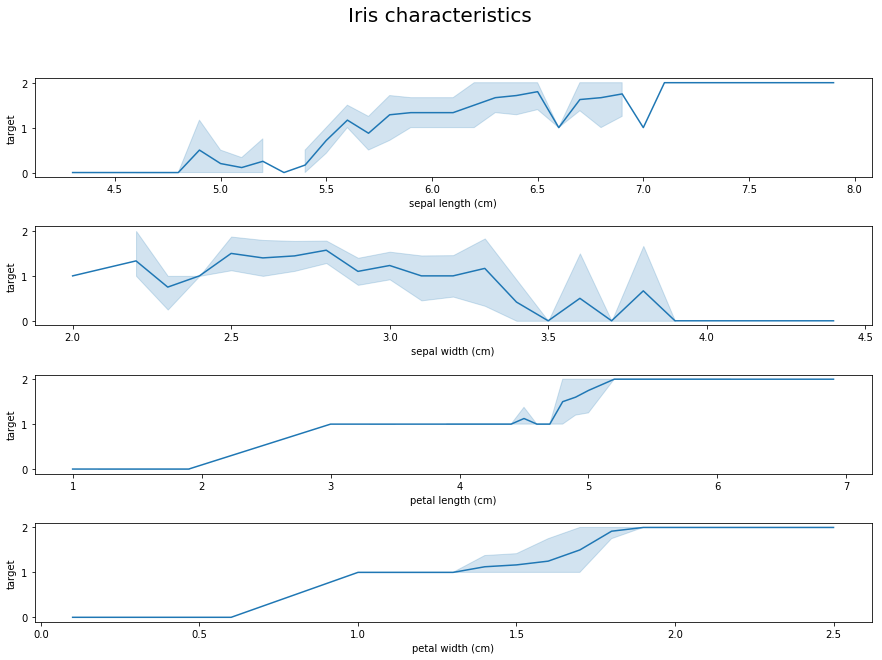

In [0]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Iris characteristics', fontsize=20)
sns.lineplot(x='sepal length (cm)', y='target', data=iris, ax=axs[0])
sns.lineplot(x='sepal width (cm)', y='target', data=iris, ax=axs[1])
sns.lineplot(x='petal length (cm)', y='target', data=iris, ax=axs[2])
sns.lineplot(x='petal width (cm)', y='target', data=iris, ax=axs[3])
plt.show()

It is possible to see that each characteristic has some behavior related to flower the classifications. For example, as the petal width increases, the classification changes too.

# Building classifying model

In [0]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris[features]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Testing model

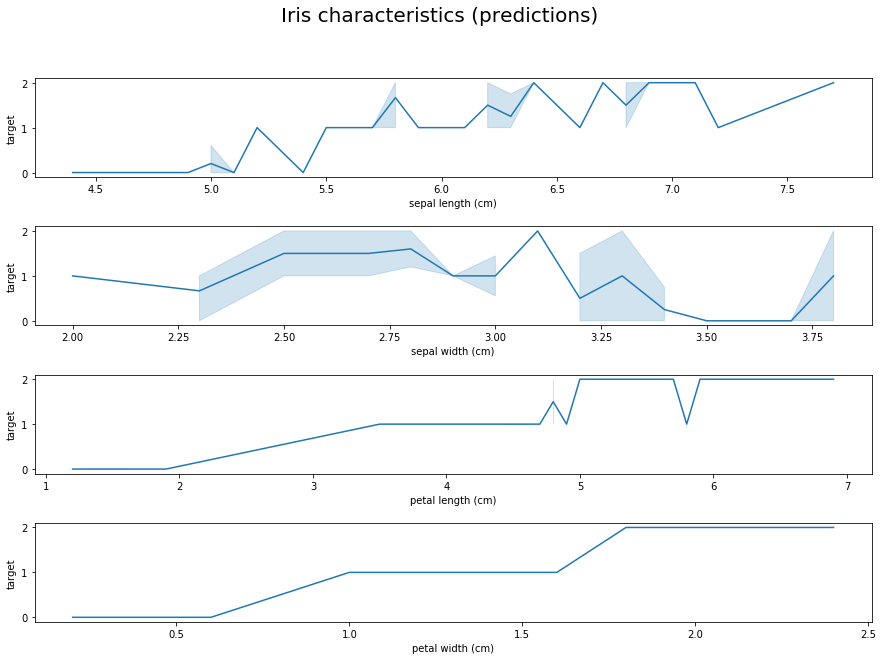

In [0]:
y_predicted = model.predict(X_test)

predicted_data = X_test.copy()
predicted_data['target'] = y_predicted

fig, axs = plt.subplots(4, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Iris characteristics (predictions)', fontsize=20)
sns.lineplot(x='sepal length (cm)', y='target', data=predicted_data, ax=axs[0])
sns.lineplot(x='sepal width (cm)', y='target', data=predicted_data, ax=axs[1])
sns.lineplot(x='petal length (cm)', y='target', data=predicted_data, ax=axs[2])
sns.lineplot(x='petal width (cm)', y='target', data=predicted_data, ax=axs[3])
plt.show()

It is possible to see that the behavior of each characteristic related to the flower classifications has some similarity to the charts plotted before, with all the data. Therefore, the classification model has some accuracy.

# Evaluating the model
However, just get conclusions based on charts is not the best choice, thus let's evaluate the model accuracy with the code below:

In [0]:
acc = accuracy_score(y_test, y_predicted)
print('Accuracy:', acc, 'that is, %.2f'%(acc*100),'%')

dmetric = classification_report(y_test, y_predicted)
print('Evaluation report\n', dmetric)

Accuracy: 0.9777777777777777 that is, 97.78 %
Evaluation report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Conclusions
The obtained results have 97.78% of accuracy and, therefore, represent successfully the patterns and behaviors of the Iris dataset and is capable to classify flowers in this context.